In [2]:
import pandas as pd

df = pd.read_csv('/Users/fuguan/Desktop/data/joined_data.csv')

# Display first 5 rows
print(df.head())

   rating                             title_x  \
0     5.0                       Pretty locket   
1     5.0                                   A   
2     3.0  Adult friendly; Not for small kids   
3     5.0                   Bright and summer   
4     5.0                 My Kid loves these!   

                                                text images_x        asin  \
0  I think this locket is really pretty. The insi...       []  B00LOPVX74   
1                                              Great       []  B07B4JXK8D   
2  Works OK for adults and is not at all kid frie...       []  B089S8MFCQ   
3  What a cute top! Cam wait to wear in warm weat...       []  B087M39LVV   
4  My son is a big Ninjago fan and these are perf...       []  B091GMMYPS   

  parent_asin                       user_id                timestamp  \
0  B00LOPVX74  AGBFYI2DDIKXC5Y4FARTYDTQBMFQ  2020-01-09 00:06:34.489   
1  B07B4JXK8D  AFQLNQNQYFWQZPJQZS6V3NZU4QBQ  2020-12-20 01:04:06.701   
2  B089S8MFCQ  AHTTU2FL6FC

In [3]:
average_rating = df['rating'].mean()
print("Average rating:", average_rating)

Average rating: 3.876701905797929


In [5]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['timestamp'].head()

0   2020-01-09 00:06:34.489
1   2020-12-20 01:04:06.701
2   2020-10-21 18:58:06.690
3   2022-01-20 23:38:14.143
4   2022-02-04 18:48:28.824
Name: timestamp, dtype: datetime64[ns]

In [6]:
most_common_asin = df['parent_asin'].value_counts().idxmax()
matching_rows = df[df['parent_asin'] == most_common_asin]
matching_titles = matching_rows['title_y'].unique()

print("Most frequent parent_asin:", most_common_asin)
print("Associated title(s):", matching_titles)

Most frequent parent_asin: B09TXZHKLG
Associated title(s): ['Casio F91W-1 Classic Resin Strap Digital Sport Watch']


In [7]:
df['word_count'] = df['text'].astype(str).apply(lambda x: len(x.split()))
non_zero_word_counts = df[df['word_count'] > 0]
average_word_count = non_zero_word_counts['word_count'].mean()

print("Average word count (excluding zeros):", average_word_count)

Average word count (excluding zeros): 27.532566029963856


In [8]:
df['word_count'] = df['text'].astype(str).apply(lambda x: len(x.split()))
non_zero_word_counts = df[df['word_count'] > 0]
average_word_count = non_zero_word_counts['word_count'].mean()

print("Average word count (excluding zeros):", average_word_count)

Average word count (excluding zeros): 27.532566029963856


In [9]:
average_price = df['price'].mean()
print("Average price:", average_price)

Average price: 28.619876910859627


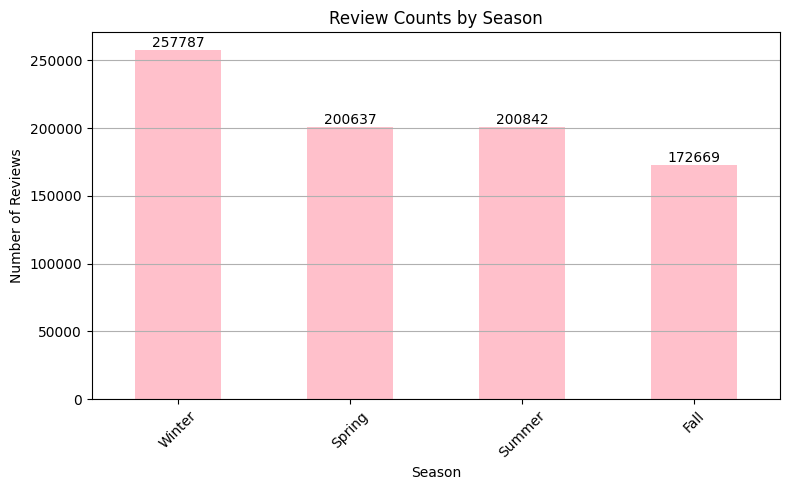

In [11]:
import matplotlib.pyplot as plt

# Function to map month to season
def get_season(date):
    month = date.month
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

df['season'] = df['timestamp'].apply(get_season)
df['year'] = df['timestamp'].dt.year
season_counts = df.groupby('season').size()

season_counts = season_counts.reindex(['Winter', 'Spring', 'Summer', 'Fall'])

plt.figure(figsize=(8, 5))
ax = season_counts.plot(kind='bar', color='pink')

for i, count in enumerate(season_counts):
    plt.text(i, count + 1, str(count), ha='center', va='bottom', fontsize=10)

plt.title('Review Counts by Season')
plt.xlabel('Season')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y')
plt.show()

In [12]:
# Step 1: Filter for Winter
def get_season(date):
    month = date.month
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

df['season'] = df['timestamp'].apply(get_season)

winter_df = df[df['season'] == 'Winter']

# Step 2: Count parent_asin frequency in Winter
top_asin = winter_df['parent_asin'].value_counts().idxmax()
top_count = winter_df['parent_asin'].value_counts().max()

# Step 3: Match to title_y
titles = winter_df[winter_df['parent_asin'] == top_asin]['title_y'].unique()

# Step 4: Output result
print("Top Winter Item:")
print(f"Parent ASIN: {top_asin}")
print(f"Number of Winter Reviews: {top_count}")
print("Title(s):", titles)


Top Winter Item:
Parent ASIN: B09KHSM7BB
Number of Winter Reviews: 1026
Title(s): ["Russell Athletic Men's Dri-Power Fleece Hoodies & Sweatshirts, Moisture Wicking, Cotton Blend, Relaxed Fit, Sizes S-4X"]


In [13]:
# Get top 5 parent_asins
top5_asins = winter_df['parent_asin'].value_counts().head(5)

# Print title for each
for asin in top5_asins.index:
    titles = winter_df[winter_df['parent_asin'] == asin]['title_y'].unique()
    print(f"\nASIN: {asin} (Count: {top5_asins[asin]})")
    print("Title(s):", titles)


ASIN: B09KHSM7BB (Count: 1026)
Title(s): ["Russell Athletic Men's Dri-Power Fleece Hoodies & Sweatshirts, Moisture Wicking, Cotton Blend, Relaxed Fit, Sizes S-4X"]

ASIN: B09TXZHKLG (Count: 905)
Title(s): ['Casio F91W-1 Classic Resin Strap Digital Sport Watch']

ASIN: B07VPGY6FX (Count: 805)
Title(s): ['OZERO Waterproof Winter Gloves Men Women -30 ℉ Cold Proof Touchscreen Anti Slip Silicon Palm - Heated Glove Thermal for Driving Cycling Motorcycle in Cold Weather Warmest Gifts for Dad']

ASIN: B09QFJGKM5 (Count: 696)
Title(s): ['Copper Fit Energy Unisex Easy-On/Easy-Off Knee High Compression Socks']

ASIN: B09M6X79V9 (Count: 599)
Title(s): ["NELEUS Women's 3 Pack Compression Base Layer Dry Fit Tank Top"]


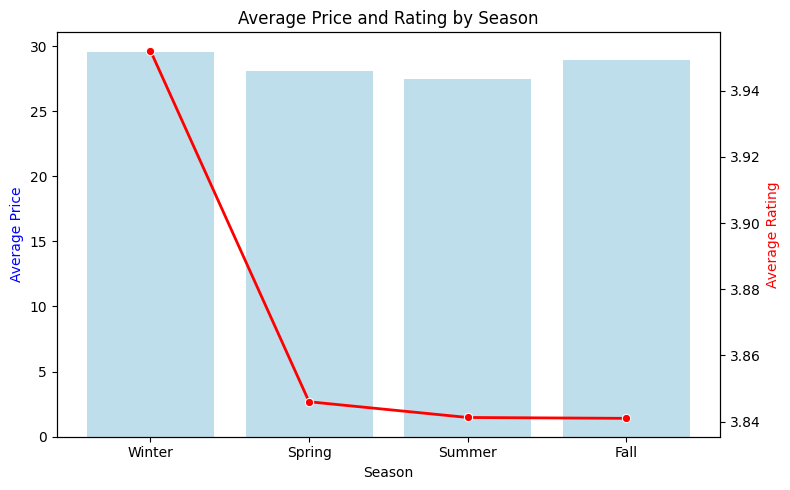

In [14]:
import seaborn as sns

# --- Step 1: Ensure timestamp is datetime and season exists ---
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='s', errors='coerce')
def get_season(date):
    if pd.isnull(date):
        return None
    month = date.month
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

df['season'] = df['timestamp'].apply(get_season)

# --- Step 2: Compute average price and rating per season ---
season_summary = (
    df.groupby('season')
      .agg(avg_price=('price', 'mean'),
           avg_rating=('rating', 'mean'))
      .reset_index()
)

# --- Step 3: Sort seasons in order ---
season_order = ['Winter', 'Spring', 'Summer', 'Fall']
season_summary['season'] = pd.Categorical(season_summary['season'], categories=season_order, ordered=True)
season_summary = season_summary.sort_values('season')

# --- Step 4: Plot on same chart (dual y-axis) ---
fig, ax1 = plt.subplots(figsize=(8,5))

# Plot average price (left y-axis)
sns.barplot(x='season', y='avg_price', data=season_summary, ax=ax1, color='skyblue', alpha=0.6)
ax1.set_ylabel('Average Price', color='blue')
ax1.set_xlabel('Season')

# Create twin axis for rating
ax2 = ax1.twinx()
sns.lineplot(x='season', y='avg_rating', data=season_summary, ax=ax2, color='red', marker='o', linewidth=2)
ax2.set_ylabel('Average Rating', color='red')

plt.title('Average Price and Rating by Season')
plt.tight_layout()
plt.show()

/var/folders/v_/lysk6p5x5xx3xpwld40tdfgr0000gn/T/ipykernel_59403/2882570723.py:58: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


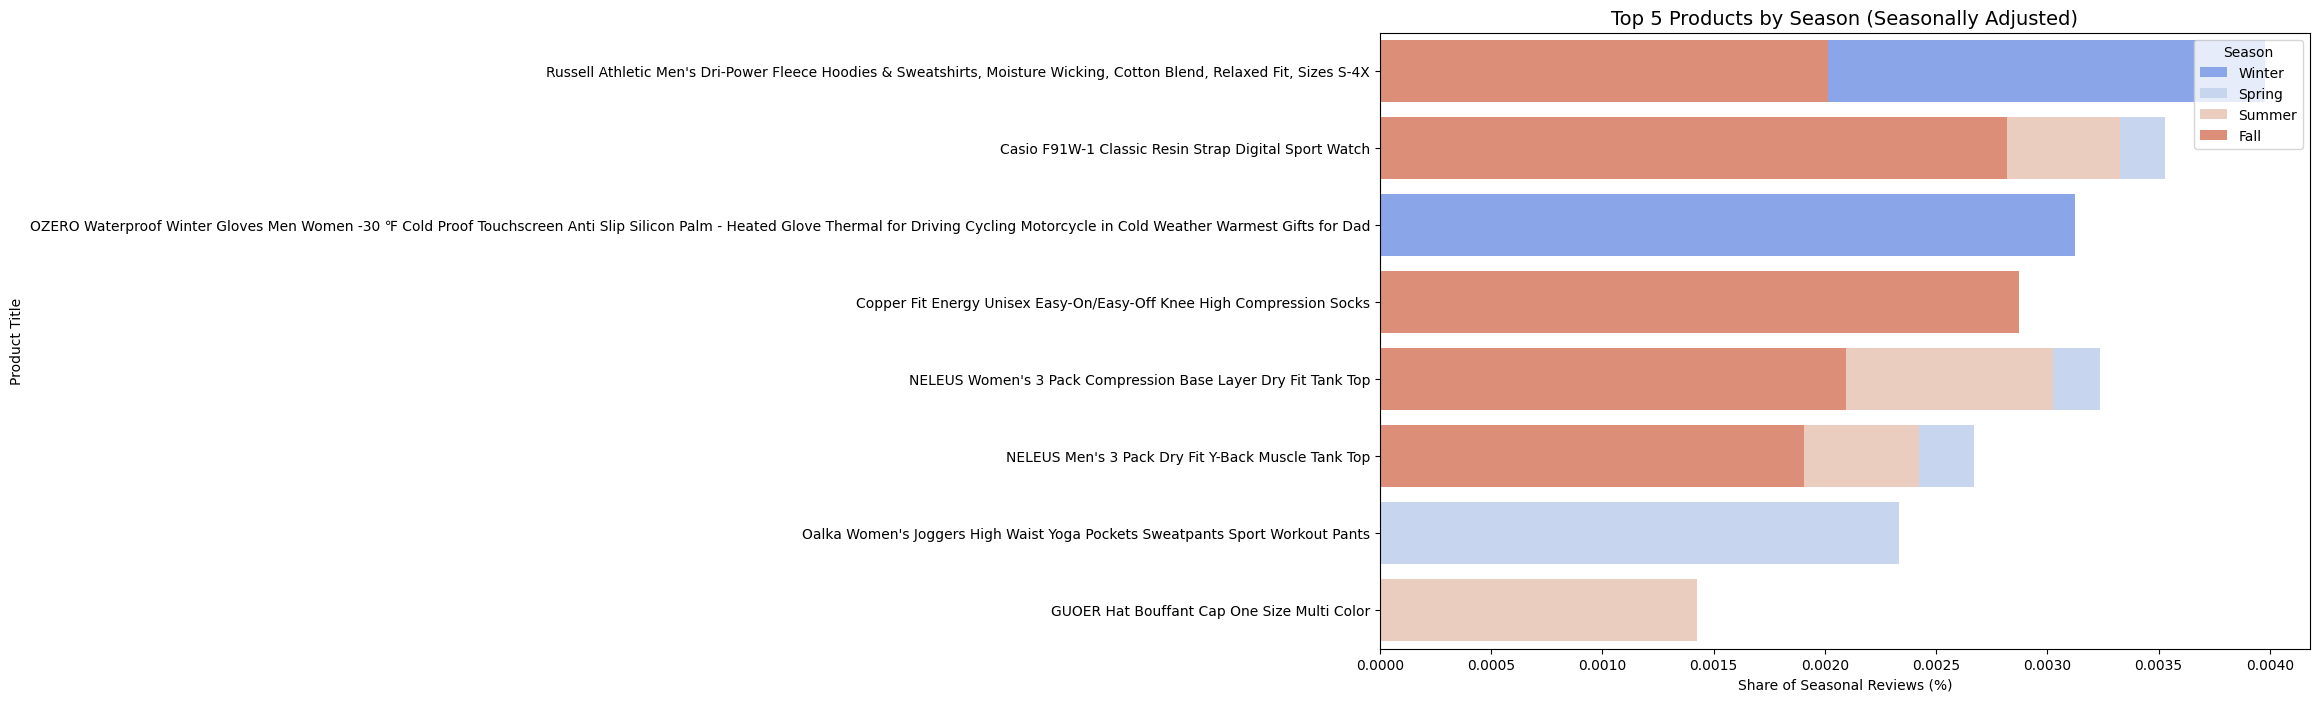

In [15]:
def get_season(date):
    if pd.isnull(date):
        return None
    m = date.month
    if m in [12, 1, 2]:
        return 'Winter'
    elif m in [3, 4, 5]:
        return 'Spring'
    elif m in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

df['season'] = df['timestamp'].apply(get_season)

# --- Step 2: Count reviews per season and per product ---
season_counts = (
    df.groupby(['season', 'parent_asin'])
      .size()
      .reset_index(name='review_count')
)

# --- Step 3: Seasonally adjust (normalize within each season) ---
# This makes values relative to total seasonal activity
total_reviews_per_season = season_counts.groupby('season')['review_count'].transform('sum')
season_counts['seasonal_share'] = season_counts['review_count'] / total_reviews_per_season

# --- Step 4: Get top 5 products by adjusted share per season ---
top5_per_season = (
    season_counts.sort_values(['season', 'seasonal_share'], ascending=[True, False])
    .groupby('season')
    .head(5)
)

# --- Step 5: Get product titles for clarity ---
titles = df[['parent_asin', 'title_y']].drop_duplicates()
top5_per_season = top5_per_season.merge(titles, on='parent_asin', how='left')

# --- Step 6: Order seasons ---
season_order = ['Winter', 'Spring', 'Summer', 'Fall']
top5_per_season['season'] = pd.Categorical(top5_per_season['season'], categories=season_order, ordered=True)
top5_per_season = top5_per_season.sort_values(['season', 'seasonal_share'], ascending=[True, False])

# --- Step 7: Visualize ---
plt.figure(figsize=(12, 8))
sns.barplot(
    data=top5_per_season,
    x='seasonal_share',
    y='title_y',
    hue='season',
    dodge=False,
    palette='coolwarm'
)
plt.title('Top 5 Products by Season (Seasonally Adjusted)', fontsize=14)
plt.xlabel('Share of Seasonal Reviews (%)')
plt.ylabel('Product Title')
plt.legend(title='Season', loc='upper right')
plt.tight_layout()
plt.show()


/Users/fuguan/Library/Python/3.9/lib/python/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/Users/fuguan/Library/Python/3.9/lib/python/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/Users/fuguan/Library/Python/3.9/lib/python/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/Users/fuguan/Library/Python/3.9/lib/python/site-packages/seaborn/axisgrid.py:854: FutureWarning: 



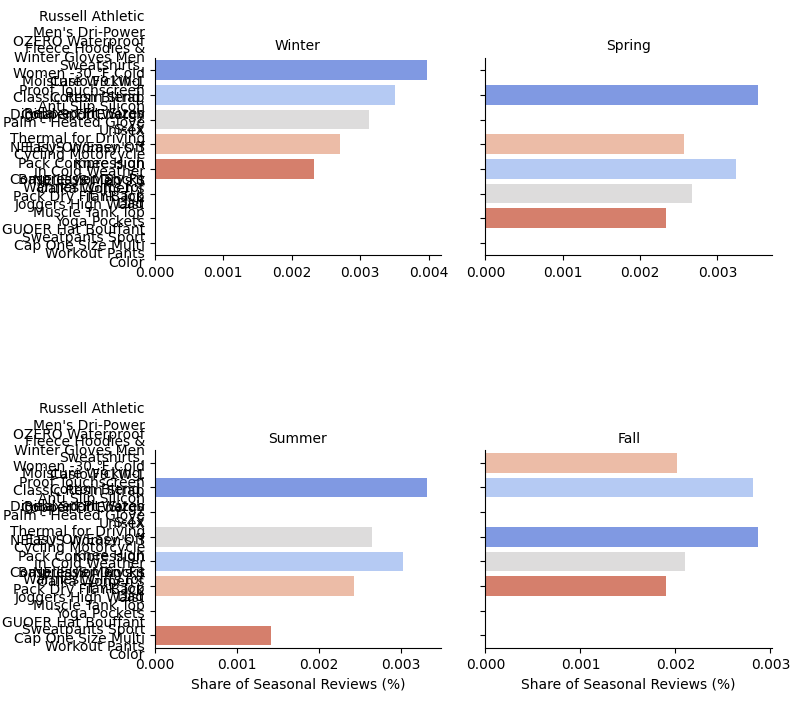

In [16]:

g = sns.FacetGrid(
    top5_per_season, 
    col='season', 
    col_wrap=2, 
    sharex=False, 
    height=4,
    col_order=['Winter','Spring','Summer','Fall']
)
g.map_dataframe(
    sns.barplot, 
    y='title_y', 
    x='seasonal_share', 
    palette='coolwarm', 
    dodge=False
)
g.set_titles("{col_name}")
g.set_axis_labels("Share of Seasonal Reviews (%)", "")
for ax in g.axes.flat:
    for label in ax.get_yticklabels():
        label.set_wrap(True)
plt.tight_layout()
plt.show()


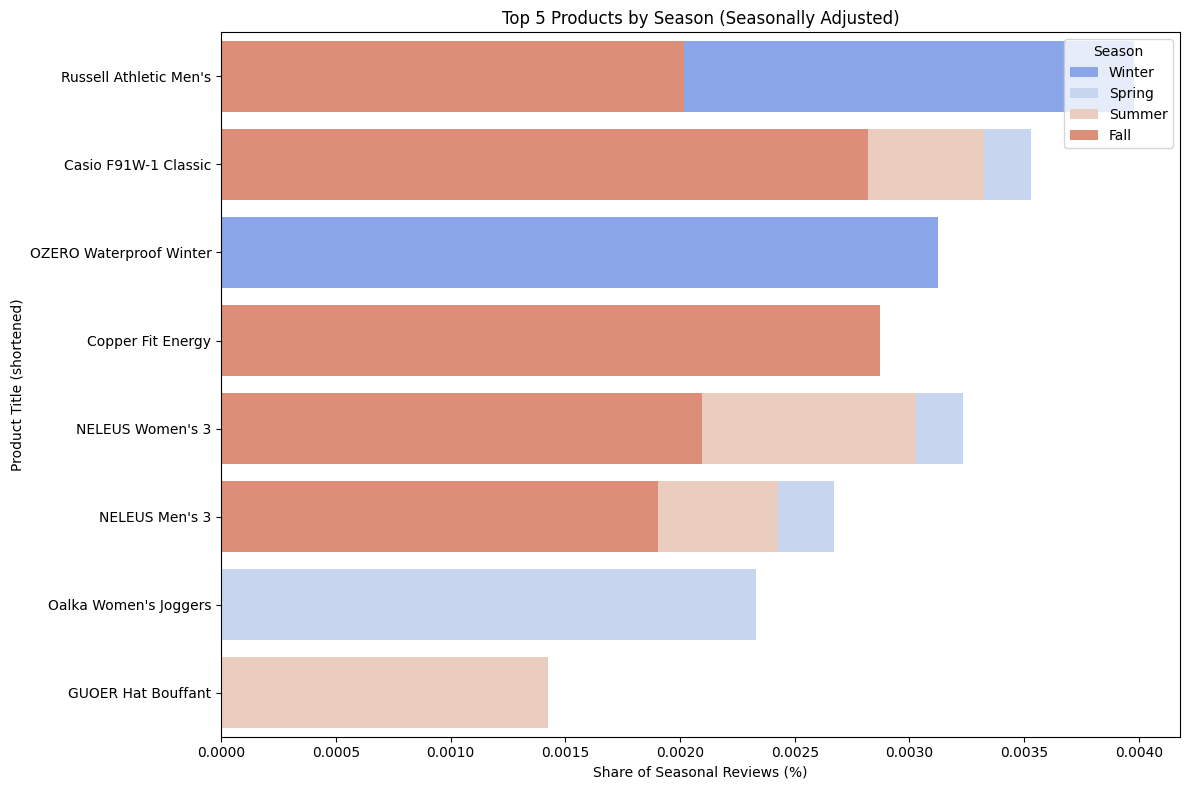

In [17]:
top5_per_season['short_title'] = top5_per_season['title_y'].apply(lambda x: ' '.join(str(x).split()[:3]))

# Then update your plot to use 'short_title' instead of 'title_y'
plt.figure(figsize=(12, 8))
sns.barplot(
    data=top5_per_season,
    x='seasonal_share',
    y='short_title',
    hue='season',
    dodge=False,
    palette='coolwarm'
)
plt.title('Top 5 Products by Season (Seasonally Adjusted)')
plt.xlabel('Share of Seasonal Reviews (%)')
plt.ylabel('Product Title (shortened)')
plt.legend(title='Season', loc='upper right')
plt.tight_layout()
plt.show()


## New Section for NLP Analysis

In [18]:
df_copy = df.copy()
df_copy

,rating,title_x,text,images_x,asin,parent_asin,user_id,timestamp,helpful_vote,verified_purchase,...,description,price,images_y,videos,store,categories,details,word_count,season,year
0,5.0,Pretty locket,I think this locket is really pretty. The insi...,[],B00LOPVX74,B00LOPVX74,AGBFYI2DDIKXC5Y4FARTYDTQBMFQ,2020-01-09 00:06:34.489,3,True,...,"[""This beautiful jewelry would be a great addi...",30.00,[{'thumb': 'https://m.media-amazon.com/images/...,[{'title': 'Irish Locket Celtic Locket Necklac...,CHUVORA,[],"{'Is Discontinued By Manufacturer': 'No', 'Pro...",58,Winter,2020
1,5.0,A,Great,[],B07B4JXK8D,B07B4JXK8D,AFQLNQNQYFWQZPJQZS6V3NZU4QBQ,2020-12-20 01:04:06.701,0,True,...,"[""Anyone looking for the best in single tread ...",20.99,[{'thumb': 'https://m.media-amazon.com/images/...,[],PrimeMed,[],"{'Is Discontinued By Manufacturer': 'No', 'Pac...",1,Winter,2020
2,3.0,Adult friendly; Not for small kids,Works OK for adults and is not at all kid frie...,[],B089S8MFCQ,B089S8MFCQ,AHTTU2FL6FCNBBAESCJHOHHSSW7A,2020-10-21 18:58:06.690,0,True,...,[],NaN,[{'thumb': 'https://m.media-amazon.com/images/...,[],Kranchungel,[],{'Package Dimensions': '5.7 x 4.6 x 0.85 inche...,20,Fall,2020
3,5.0,Bright and summer,What a cute top! Cam wait to wear in warm weat...,[],B087M39LVV,B087M39LVV,AEQAYV7RXZEBXMQIQPL6KCT2CFWQ,2022-01-20 23:38:14.143,0,True,...,[],NaN,[{'thumb': 'https://m.media-amazon.com/images/...,[],Twotwowin,[],{'Package Dimensions': '13.54 x 9.06 x 1.33 in...,13,Winter,2022
4,5.0,My Kid loves these!,My son is a big Ninjago fan and these are perf...,[],B091GMMYPS,B091GMMYPS,AEVPPTMG43C6GWSR7I2UGRQN7WFQ,2022-02-04 18:48:28.824,0,True,...,[],NaN,[{'thumb': 'https://m.media-amazon.com/images/...,[],Melitolay,[],"{'Brand': 'Melitolay', 'Material': 'Polyester'...",78,Winter,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
831930,5.0,Great piece!,Super cute!,[],B07HF4GDWS,B07HF4F6LP,AG4N46GFOECH7THIIQWVBVKCIS2Q,2021-05-30 23:42:42.440,0,True,...,['Charmed Craft Mother Mom Love Child Charms E...,9.99,[{'thumb': 'https://m.media-amazon.com/images/...,[],Charmed Craft,[],"{'Is Discontinued By Manufacturer': 'No', 'Pac...",2,Spring,2021
831931,1.0,You suck,Y’all took to damn long I got it may 18th and ...,[],B07HF4GDWS,B07HF4F6LP,AGUGFDHYUKELUZTJU3373XO2QVGA,2020-05-18 21:22:06.602,0,True,...,['Charmed Craft Mother Mom Love Child Charms E...,9.99,[{'thumb': 'https://m.media-amazon.com/images/...,[],Charmed Craft,[],"{'Is Discontinued By Manufacturer': 'No', 'Pac...",19,Spring,2020
831932,1.0,Ok,It should have had enshrined on both sides,[],B07HF4GDWS,B07HF4F6LP,AH7PTXXCYHBGJN2KMKMTGI6NBV4A,2021-02-10 19:54:42.236,0,True,...,['Charmed Craft Mother Mom Love Child Charms E...,9.99,[{'thumb': 'https://m.media-amazon.com/images/...,[],Charmed Craft,[],"{'Is Discontinued By Manufacturer': 'No', 'Pac...",8,Winter,2021
831933,5.0,100% Recommend,I bought this for my mom for Mother’s Day she ...,[],B07HF4GDWS,B07HF4F6LP,AH7Q2PTD6CLQVTLM6MQCYWP5ZOVA,2020-07-16 17:43:12.373,0,True,...,['Charmed Craft Mother Mom Love Child Charms E...,9.99,[{'thumb': 'https://m.media-amazon.com/images/...,[],Charmed Craft,[],"{'Is Discontinued By Manufacturer': 'No', 'Pac...",22,Summer,2020


In [19]:
%pip install wordcloud
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.sentiment import SentimentIntensityAnalyzer
import re
from collections import Counter
import warnings
warnings.filterwarnings('ignore')


def clean_text(text):
    """
    Clean text by removing special characters, converting to lowercase, etc.
    """
    if pd.isna(text):
        return ""
    text = text.lower() # convert to lowercase
    text = re.sub(r'[^a-z\s]', '', text) # remove special characters and numbers
    text = re.sub(r'\s+', ' ', text).strip() # remove extra whitespace
    cleaned = text 
    return cleaned

stop_words = set(stopwords.words('english'))

def tokenize_and_filter(text):
    """
    Tokenize text and remove stopwords.
    """
    if not text:
        return []
    tokens = word_tokenize(text)
    filtered_tokens = [t.lower() for t in tokens if t.isalpha() and t.lower() not in stop_words]
    return filtered_tokens

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 168 kB 7.9 MB/s eta 0:00:01
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [21]:
# Download required NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')

# Set up plotting style
plt.style.use('default')
sns.set_palette("husl")

print("Setup complete!")

def clean_text(text):
    """
    Clean text by removing special characters, converting to lowercase, etc.
    """
    if pd.isna(text):
        return ""
    text = text.lower()  # convert to lowercase
    text = re.sub(r'[^a-z\s]', '', text)  # remove special characters and numbers
    text = re.sub(r'\s+', ' ', text).strip()  # remove extra whitespace
    cleaned = text
    return cleaned

df_copy['cleaned_text'] = df_copy['text'].apply(clean_text)

df_copy = df_copy[df_copy['cleaned_text'].apply(lambda x: len(x.split()) >= 2)]

# df2['timestamp'] = pd.to_datetime(df2['timestamp'], unit='s', errors='coerce')

df_copy.head()

[nltk_data] Downloading package punkt to /Users/fuguan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/fuguan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/fuguan/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Setup complete!


,rating,title_x,text,images_x,asin,parent_asin,user_id,timestamp,helpful_vote,verified_purchase,...,price,images_y,videos,store,categories,details,word_count,season,year,cleaned_text
0,5.0,Pretty locket,I think this locket is really pretty. The insi...,[],B00LOPVX74,B00LOPVX74,AGBFYI2DDIKXC5Y4FARTYDTQBMFQ,2020-01-09 00:06:34.489,3,True,...,30.0,[{'thumb': 'https://m.media-amazon.com/images/...,[{'title': 'Irish Locket Celtic Locket Necklac...,CHUVORA,[],"{'Is Discontinued By Manufacturer': 'No', 'Pro...",58,Winter,2020,i think this locket is really pretty the insid...
2,3.0,Adult friendly; Not for small kids,Works OK for adults and is not at all kid frie...,[],B089S8MFCQ,B089S8MFCQ,AHTTU2FL6FCNBBAESCJHOHHSSW7A,2020-10-21 18:58:06.690,0,True,...,NaN,[{'thumb': 'https://m.media-amazon.com/images/...,[],Kranchungel,[],{'Package Dimensions': '5.7 x 4.6 x 0.85 inche...,20,Fall,2020,works ok for adults and is not at all kid frie...
3,5.0,Bright and summer,What a cute top! Cam wait to wear in warm weat...,[],B087M39LVV,B087M39LVV,AEQAYV7RXZEBXMQIQPL6KCT2CFWQ,2022-01-20 23:38:14.143,0,True,...,NaN,[{'thumb': 'https://m.media-amazon.com/images/...,[],Twotwowin,[],{'Package Dimensions': '13.54 x 9.06 x 1.33 in...,13,Winter,2022,what a cute top cam wait to wear in warm weath...
4,5.0,My Kid loves these!,My son is a big Ninjago fan and these are perf...,[],B091GMMYPS,B091GMMYPS,AEVPPTMG43C6GWSR7I2UGRQN7WFQ,2022-02-04 18:48:28.824,0,True,...,NaN,[{'thumb': 'https://m.media-amazon.com/images/...,[],Melitolay,[],"{'Brand': 'Melitolay', 'Material': 'Polyester'...",78,Winter,2022,my son is a big ninjago fan and these are perf...
5,2.0,Not what was expected,There are lots of raw edges. Not well made. ...,[],B09DQ5M2BB,B09DQ5M2BB,AHREXOGQPZDA6354MHH4ETSF3MCQ,2021-10-21 04:50:43.960,1,True,...,NaN,[{'thumb': 'https://m.media-amazon.com/images/...,[],snugwind,[],{'Package Dimensions': '14.48 x 11.06 x 1.81 i...,29,Fall,2021,there are lots of raw edges not well made not ...


In [ ]:
from collections import Counter
# find most common words in cleaned_text for winter season

stop_words = {
    'the', 'i', 'and', 'a', 'it', 'of', 'to', 'in', 'for', 'on', 'with', 'as', 
    'at', 'by', 'an', 'that', 'which', 'who', 'is', 'are', 'but', 'this', 
    'was', 'my', 'be', 'or', 'not', 'have', 'had', 'will', 'would', 'there', 
    'how', 'we', 'you', 'he', 'she', 'they', 'been', 'has', 'had', 'do', 'does', 
    'doing', 'did', 'doing', 'shall', 'should', 'could', 'their', 'ours', 
    'yours', 'them', 'your', 'his', 'hers', 'its', 'our', 'us', 'all', 'each', 
    'some', 'such', 'no', 'nor', 'not', 'under', 'over', 'up', 'down', 'out', 
    'into', 'from', 'during', 'before', 'after', 'above', 'below', 'while', 
    'among', 'between', 'both', 'few', 'more', 'most', 'less', 'least', 'own', 
    'other', 'another', 'this', 'that', 'these', 'those', 'a', 'an', 'which', 
    'who', 'whom', 'how', 'where', 'when', 'why', 'can', 'will', 'just', 
    'than', 'so', 'because', 'like', 'than', 'being', 'having'
}

winter_df = df_copy[df_copy['season'] == 'Winter']  
spring_df = df_copy[df_copy['season'] == 'Spring']
summer_df = df_copy[df_copy['season'] == 'Summer']
fall_df = df_copy[df_copy['season'] == 'Fall']

# ----------------------------

# top 5 words winter
winter_words = ' '.join(winter_df['cleaned_text']).split()
filtered_winter_words = [word for word in winter_words if word.lower() not in stop_words]
winter_word_counts = Counter(filtered_winter_words)
winter_top10 = winter_word_counts.most_common(10)
print("Top 10 words in Winter:", winter_top10)

# top 5 words spring
spring_words = ' '.join(spring_df['cleaned_text']).split()
filtered_spring_words = [word for word in spring_words if word.lower() not in stop_words]
spring_word_counts = Counter(filtered_spring_words)
spring_top10 = spring_word_counts.most_common(10)
print("Top 10 words in Spring:", spring_top10)

# top 5 words summer
summer_words = ' '.join(summer_df['cleaned_text']).split()
filtered_summer_words = [word for word in summer_words if word.lower() not in stop_words]
summer_word_counts = Counter(filtered_summer_words)
summer_top10 = summer_word_counts.most_common(10)
print("Top 10 words in Summer:", summer_top10)

# top 5 words fall
fall_words = ' '.join(fall_df['cleaned_text']).split()
filtered_fall_words = [word for word in fall_words if word.lower() not in stop_words]
fall_word_counts = Counter(filtered_fall_words)
fall_top10 = fall_word_counts.most_common(10)
print("Top 10 words in Fall:", fall_top10)

Top 10 words in Winter: [('very', 57060), ('great', 41248), ('fit', 39632), ('love', 36669), ('size', 32800), ('good', 27882), ('too', 26272), ('quality', 25707), ('nice', 24755), ('wear', 24509)]
Top 10 words in Spring: [('very', 43916), ('fit', 31899), ('love', 31261), ('great', 31208), ('size', 27767), ('too', 21863), ('good', 21375), ('wear', 20060), ('small', 19208), ('quality', 18730)]
Top 10 words in Summer: [('very', 44732), ('fit', 33200), ('great', 31648), ('love', 31383), ('size', 28972), ('too', 22447), ('good', 21577), ('wear', 21277), ('comfortable', 20255), ('one', 18903)]
Top 10 words in Fall: [('very', 39588), ('fit', 29218), ('great', 27920), ('size', 25362), ('love', 25267), ('good', 19895), ('too', 19871), ('wear', 19145), ('quality', 17327), ('comfortable', 17203)]


In [ ]:
# average word length for reviews per season

def average_word_length(text):
    words = text.split()
    if len(words) == 0:
        return 0
    return sum(len(word) for word in words) / len(words)    

average_word_length(winter_df['cleaned_text'].str.cat(sep=' '))

4.135985285680807

In [31]:
average_word_length(spring_df['cleaned_text'].str.cat(sep=' '))

4.1365277946749215

In [32]:
average_word_length(summer_df['cleaned_text'].str.cat(sep=' '))


4.135829385851483

In [33]:
average_word_length(fall_df['cleaned_text'].str.cat(sep=' '))

4.135985285680807

In [34]:
# Find unique words in each season

winter_unique = set(filtered_winter_words)
spring_unique = set(filtered_spring_words)
summer_unique = set(filtered_summer_words)
fall_unique = set(filtered_fall_words) 

print("Unique words in Winter:", winter_unique)
print("Unique words in Spring:", spring_unique)
print("Unique words in Summer:", summer_unique)
print("Unique words in Fall:", fall_unique)

Unique words in Winter: {'gorilla', 'blood', 'fold', 'shirtssweaters', 'aloof', 'againsize', 'klein', 'highstreet', 'kayacking', 'motionbr', 'multitime', 'bathtime', 'pacify', 'handwashed', 'purchasesbr', 'duvalin', 'surgical', 'talllong', 'semilegit', 'rainsnow', 'taker', 'kidsin', 'phases', 'dodthese', 'framebrown', 'certainky', 'beautiful', 'pushpin', 'breathesgreat', 'arround', 'mirrow', 'bobs', 'unwrinkle', 'collie', 'landresscomuk', 'flawed', 'walnut', 'encantoo', 'dremel', 'lala', 'emily', 'menmy', 'dirtscuff', 'hojos', 'cutesoft', 'reek', 'hair', 'videoidabadeeccffeefc', 'separating', 'europa', 'obstruction', 'noy', 'comfortableespecially', 'fulls', 'loner', 'puckerd', 'seamtress', 'cheersbr', 'futuro', 'ridiculously', 'visceral', 'devises', 'sorted', 'delgadael', 'lobectomy', 'fabricchecks', 'spender', 'bottomhip', 'toonow', 'needleetcbr', 'strengthcardio', 'unfunctionable', 'nodont', 'subposed', 'nonrestrictivei', 'nightcap', 'burgundydark', 'faltered', 'assess', 'videoidffbe

In [35]:
# sentimment analysis per season
sia = SentimentIntensityAnalyzer()

df_copy['sentiment'] = df_copy['cleaned_text'].apply(lambda x: sia.polarity_scores(x)['compound'])
df_copy.head()

,rating,title_x,text,images_x,asin,parent_asin,user_id,timestamp,helpful_vote,verified_purchase,...,images_y,videos,store,categories,details,word_count,season,year,cleaned_text,sentiment
0,5.0,Pretty locket,I think this locket is really pretty. The insi...,[],B00LOPVX74,B00LOPVX74,AGBFYI2DDIKXC5Y4FARTYDTQBMFQ,2020-01-09 00:06:34.489,3,True,...,[{'thumb': 'https://m.media-amazon.com/images/...,[{'title': 'Irish Locket Celtic Locket Necklac...,CHUVORA,[],"{'Is Discontinued By Manufacturer': 'No', 'Pro...",58,Winter,2020,i think this locket is really pretty the insid...,0.8532
2,3.0,Adult friendly; Not for small kids,Works OK for adults and is not at all kid frie...,[],B089S8MFCQ,B089S8MFCQ,AHTTU2FL6FCNBBAESCJHOHHSSW7A,2020-10-21 18:58:06.690,0,True,...,[{'thumb': 'https://m.media-amazon.com/images/...,[],Kranchungel,[],{'Package Dimensions': '5.7 x 4.6 x 0.85 inche...,20,Fall,2020,works ok for adults and is not at all kid frie...,0.6597
3,5.0,Bright and summer,What a cute top! Cam wait to wear in warm weat...,[],B087M39LVV,B087M39LVV,AEQAYV7RXZEBXMQIQPL6KCT2CFWQ,2022-01-20 23:38:14.143,0,True,...,[{'thumb': 'https://m.media-amazon.com/images/...,[],Twotwowin,[],{'Package Dimensions': '13.54 x 9.06 x 1.33 in...,13,Winter,2022,what a cute top cam wait to wear in warm weath...,0.8176
4,5.0,My Kid loves these!,My son is a big Ninjago fan and these are perf...,[],B091GMMYPS,B091GMMYPS,AEVPPTMG43C6GWSR7I2UGRQN7WFQ,2022-02-04 18:48:28.824,0,True,...,[{'thumb': 'https://m.media-amazon.com/images/...,[],Melitolay,[],"{'Brand': 'Melitolay', 'Material': 'Polyester'...",78,Winter,2022,my son is a big ninjago fan and these are perf...,0.9517
5,2.0,Not what was expected,There are lots of raw edges. Not well made. ...,[],B09DQ5M2BB,B09DQ5M2BB,AHREXOGQPZDA6354MHH4ETSF3MCQ,2021-10-21 04:50:43.960,1,True,...,[{'thumb': 'https://m.media-amazon.com/images/...,[],snugwind,[],{'Package Dimensions': '14.48 x 11.06 x 1.81 i...,29,Fall,2021,there are lots of raw edges not well made not ...,0.0577


In [41]:
# average sentiment per season
winter_sentiment_avg = df_copy[df_copy['season'] == 'Winter']['sentiment'].mean()
print("Average Winter Sentiment:", winter_sentiment_avg)

fall_sentiment_avg = df_copy[df_copy['season'] == 'Fall']['sentiment'].mean()
print("Average Fall Sentiment:", fall_sentiment_avg)

spring_sentiment_avg = df_copy[df_copy['season'] == 'Spring']['sentiment'].mean()
print("Average Spring Sentiment:", spring_sentiment_avg)

summer_sentiment_avg = df_copy[df_copy['season'] == 'Summer']['sentiment'].mean()
print("Average Summer Sentiment:", summer_sentiment_avg)

Average Winter Sentiment: 0.4742278380582911
Average Fall Sentiment: 0.4570444288029527
Average Spring Sentiment: 0.4547072107704792
Average Summer Sentiment: 0.456389688260387


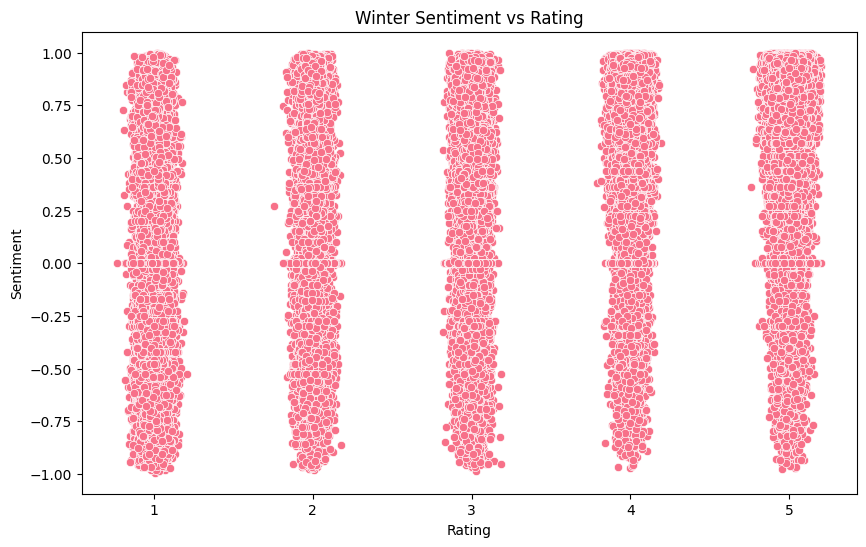

In [43]:
# winter sentiment plot (rating v sentiment)

jitter_strength = 0.05  # Control how much jitter you want
winter_sentiment = df_copy[df_copy['season'] == 'Winter']

winter_sentiment['jittered_rating'] = winter_sentiment['rating'] + np.random.normal(0, jitter_strength, size=len(winter_sentiment))

# Plotting with jitter
plt.figure(figsize=(10, 6))
sns.scatterplot(data=winter_sentiment, x='jittered_rating', y='sentiment')
plt.title('Winter Sentiment vs Rating')
plt.xlabel('Rating')
plt.ylabel('Sentiment')
plt.show()

In [42]:
# lowest and highest sentiment reviews

lowest_sentiment_review = df_copy.loc[df_copy['sentiment'].idxmin()]
print("Lowest Sentiment Review:")
print(lowest_sentiment_review[['cleaned_text', 'sentiment', 'rating', 'season']])

highest_sentiment_review = df_copy.loc[df_copy['sentiment'].idxmax()]
print("Highest Sentiment Review:")
print(highest_sentiment_review[['cleaned_text', 'sentiment', 'rating', 'season']])

Lowest Sentiment Review:
cleaned_text    shock clockbr as other reviewers have said i l...
sentiment                                                 -0.9952
rating                                                        1.0
season                                                       Fall
Name: 179099, dtype: object
Highest Sentiment Review:
cleaned_text    i grabbed these jousen mens boots fashion zipp...
sentiment                                                  0.9998
rating                                                        5.0
season                                                     Winter
Name: 5255, dtype: object


sentiment_category  negative  neutral  positive
season                                         
Fall                   24431    18604    126031
Spring                 27543    22647    145753
Summer                 27993    22267    146186
Winter                 32186    27482    191657


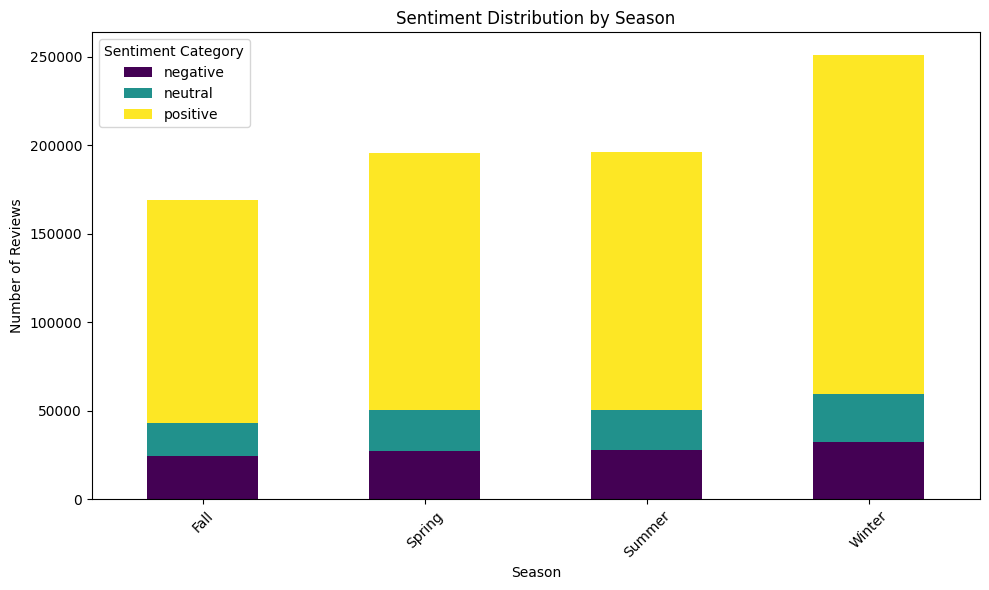

In [ ]:
# number of positive, negative, neutral reviews per season
def categorize_sentiment(score):
    if score >= 0.05:
        return 'positive'
    elif score <= -0.05:
        return 'negative'
    else:
        return 'neutral'
    

df_copy['sentiment_category'] = df_copy['sentiment'].apply(categorize_sentiment)
sentiment_counts = df_copy.groupby(['season', 'sentiment_category']).size().unstack(fill_value=0)
print(sentiment_counts)

# Plotting sentiment distribution per season
sentiment_counts.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
plt.title('Sentiment Distribution by Season')
plt.xlabel('Season')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45)
plt.legend(title='Sentiment Category')
plt.tight_layout()
plt.show()